### Feature Scaling

###### Two types of Scaling 1.Standardization 2.Normalization
###### Usko us time use karta han jab data balance na ho or ham na data ko balance karna ho yani data k between bhut zada gap ho example 10,1000,2000,5000,12000

## Standardization Technique 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\loan_dataset.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Select numerical columns for scaling
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
# Apply scaling
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
# Display the first few rows of the scaled dataset
dataset.head()  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,0.000000,0.276642,0.432861,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.219273,0.276642,0.432861,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.957641,0.276642,0.432861,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.314547,0.276642,0.432861,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.064454,0.276642,0.432861,Urban,Y


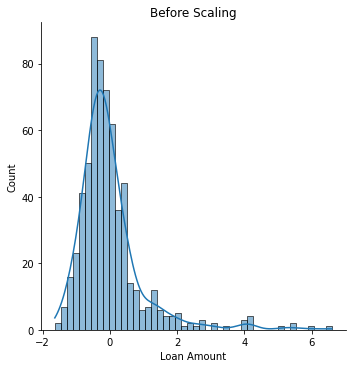

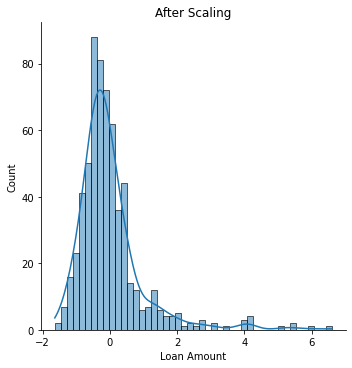

In [18]:
# Visualizing the distribution of Loan Amount before and before scaling
sns.displot(dataset['LoanAmount'], kde=True)
plt.title('Before Scaling')
plt.xlabel('Loan Amount')

# Visualizing the distribution of Loan Amount after and before scaling
sns.displot(dataset['LoanAmount'], kde=True)
plt.title('After Scaling')
plt.xlabel('Loan Amount')
plt.show()

In [19]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.000000e+02,5.640000e+02
mean,-2.694189e-17,-3.977998e-18,1.952835e-17,-1.115774e-16,3.385787e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000834e+00,1.000888e+00
min,-8.606493e-01,-5.544873e-01,-1.636463e+00,-5.071764e+00,-2.310212e+00
25%,-4.138159e-01,-5.544873e-01,-5.497524e-01,2.766417e-01,4.328607e-01
50%,-2.606393e-01,-1.480047e-01,-2.073642e-01,2.766417e-01,4.328607e-01
75%,6.414426e-02,2.312023e-01,2.183882e-01,2.766417e-01,4.328607e-01
max,1.238462e+01,1.369617e+01,6.592764e+00,2.120919e+00,4.328607e-01


In [21]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,0.000000,0.276642,0.432861,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.219273,0.276642,0.432861,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.957641,0.276642,0.432861,Urban,Y


## Feature Scaling with Normalization Technique -Min-Max Scaling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\loan_dataset.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


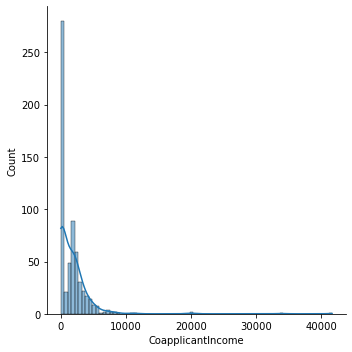

In [6]:
sns.displot(dataset['CoapplicantIncome'], kde=True)
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[['CoapplicantIncome']])
dataset['CoapplicantIncome_scaled'] = scaler.transform(dataset[['CoapplicantIncome']])
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_scaled
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


In [8]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CoapplicantIncome_scaled
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.038910
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.070229
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,0.028524
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,0.055134
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


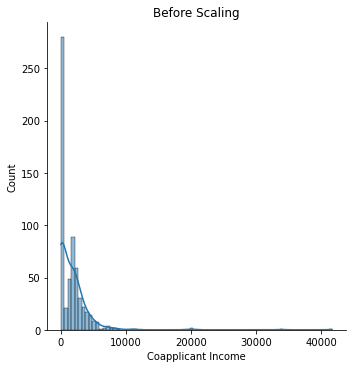

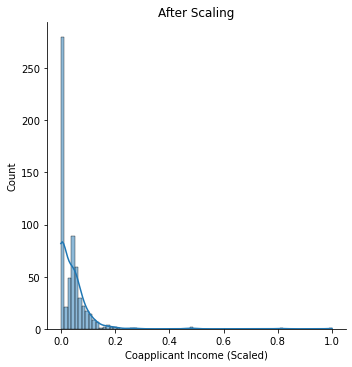

In [11]:

sns.displot(dataset['CoapplicantIncome'], kde=True)
plt.title('Before Scaling')
plt.xlabel('Coapplicant Income')


sns.displot(dataset['CoapplicantIncome_scaled'], kde=True)
plt.title('After Scaling')
plt.xlabel('Coapplicant Income (Scaled)')
plt.show()